In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
data = pd.read_csv('C:/Users/Sadia Jamal/Downloads/Amazon.csv', encoding='latin1')

In [40]:
data.head()

,year,state,month,number,date
0,1998,Acre,January,0.0,1/1/1998
1,1999,Acre,January,0.0,1/1/1999
2,2000,Acre,January,0.0,1/1/2000
3,2001,Acre,January,0.0,1/1/2001
4,2002,Acre,January,0.0,1/1/2002


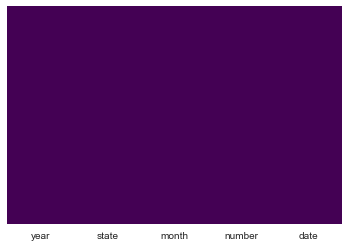

In [41]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [42]:
data.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [43]:
data.keys()

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

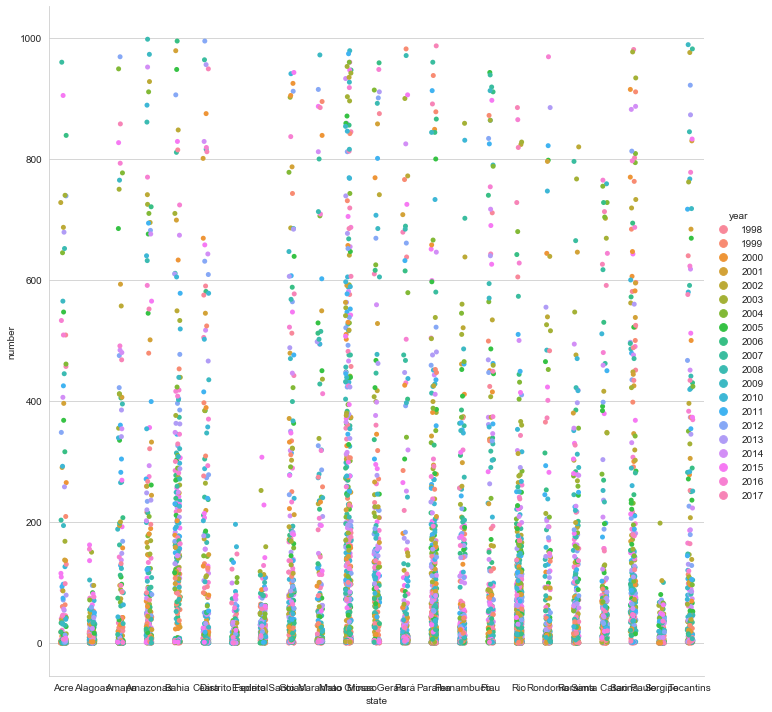

In [53]:
sns.catplot(x="state", y="number", hue="year", data=data, size = 10)
            

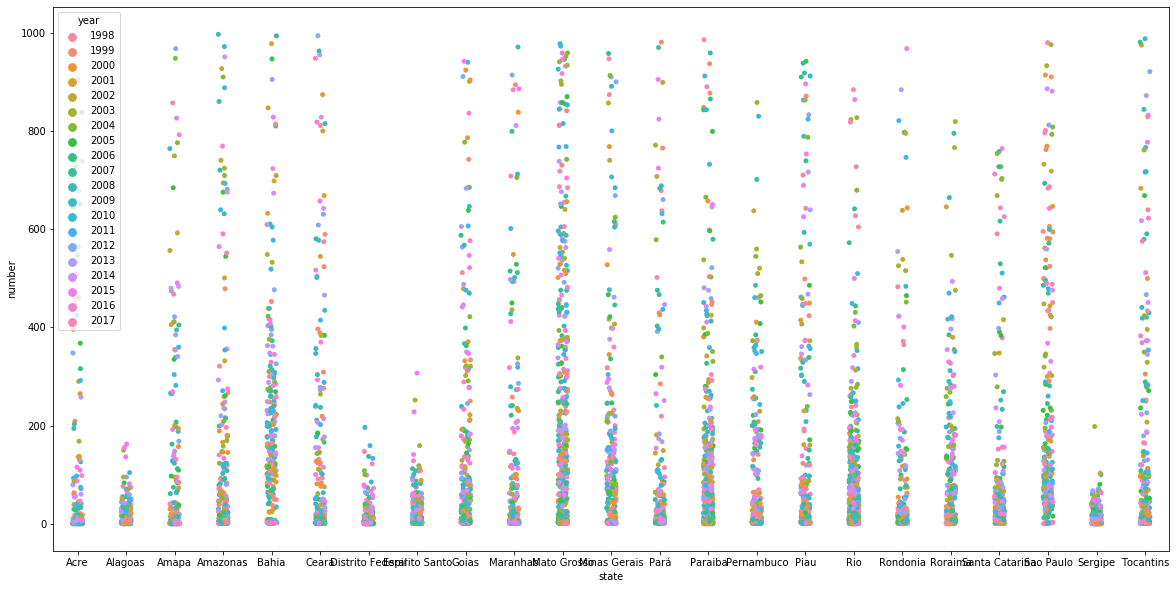

In [9]:
plt.figure(figsize=(20,10))
sns.stripplot(x="state", y="number", hue="year", data=data)

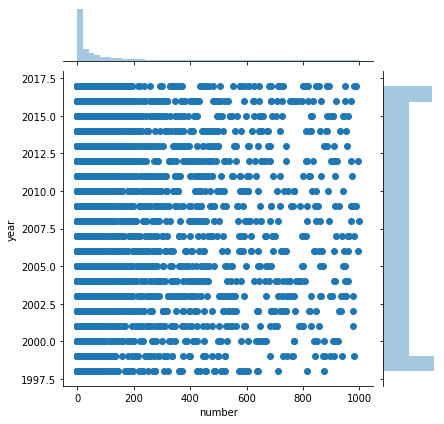

In [10]:
sns.jointplot(x='number',y='year',data=data)

In [11]:
year_mo_state = data.groupby(by = ['year','state', 'month']).sum().reset_index()


(1998, 2017)

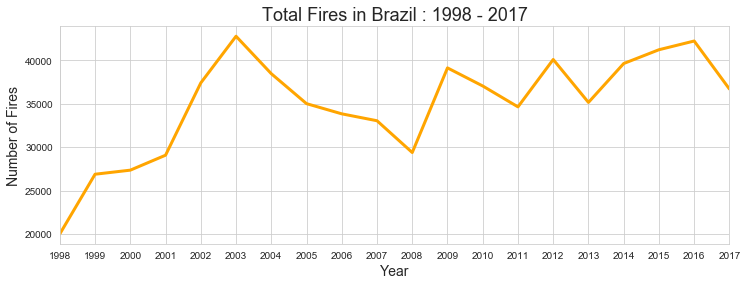

In [12]:
sns.set_style('whitegrid')
from matplotlib.pyplot import MaxNLocator, FuncFormatter

plt.figure(figsize=(12,4))

ax = sns.lineplot(x = 'year', y = 'number', data = year_mo_state, estimator = 'sum', color = 'orange', lw = 3, 
                  err_style = None)

plt.title('Total Fires in Brazil : 1998 - 2017', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Fires', fontsize = 14)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

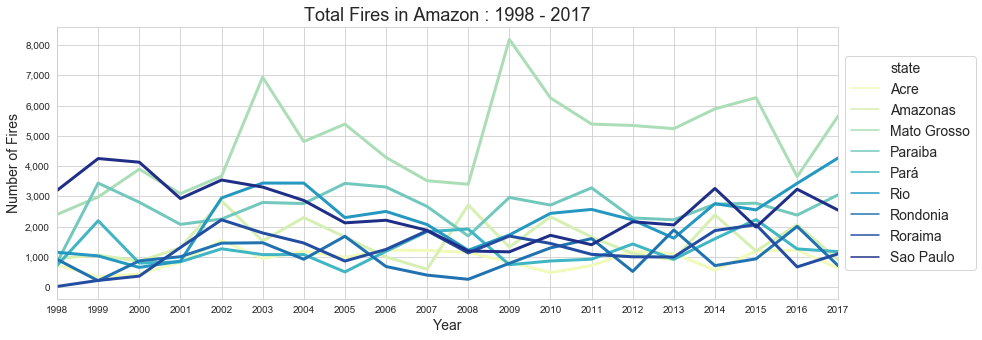

In [14]:
#total fire in brazil with states visualization
year_mo_state_top_states = data[data['state'].isin(['Amazonas','Mato Grosso','Paraiba','Sao Paulo','Rio','Acre','Tocantins'
                                                    'Amapá','Pará','Rondonia','Roraima','Maranhão'])].groupby(by = ['year','state', 'month']).sum().reset_index()

plt.figure(figsize=(14,5))

ax = sns.lineplot(x = 'year', y = 'number', data = year_mo_state_top_states, hue = 'state', estimator = 'sum', color = 'orange', lw = 3, 
                  err_style = None, palette = 'YlGnBu')

plt.title('Total Fires in Amazon : 1998 - 2017', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Fires', fontsize = 14)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=4)

In [19]:
X = np.array(data['number'])

In [20]:
X = X.reshape(-1,1)

In [21]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
centers = kmeans.cluster_centers_
centers

array([[ 20.70641215],
       [443.41721854],
       [175.92478303],
       [797.47810219]])

In [23]:
kmeans.labels_

array([0, 0, 0, ..., 2, 1, 2])

In [24]:
# for unknown label we can't determine the output of the model,so I want to check the confusion matrix,
#and classification report. To do so I will just make a cluster column which will return 0 or 1.
def converter(number):
    if number == 'Yes':
        return 1
    else:
        return 0

In [25]:
data['Cluster'] = data['number'].apply(converter)

In [26]:
data.head()

,year,state,month,number,date,Cluster
0,1998,Acre,January,0.0,1/1/1998,0
1,1999,Acre,January,0.0,1/1/1999,0
2,2000,Acre,January,0.0,1/1/2000,0
3,2001,Acre,January,0.0,1/1/2001,0
4,2002,Acre,January,0.0,1/1/2002,0


In [27]:
from sklearn.metrics import confusion_matrix,classification_report

In [28]:
print(confusion_matrix(data['Cluster'],kmeans.labels_))
print('\n')
print(classification_report(data['Cluster'],kmeans.labels_))

[[4690  455 1035  274]
 [   0    0    0    0]
 [   0    0    0    0]
 [   0    0    0    0]]


              precision    recall  f1-score   support

           0       1.00      0.73      0.84      6454
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.73      6454
   macro avg       0.25      0.18      0.21      6454
weighted avg       1.00      0.73      0.84      6454



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [54]:
# sum_square will be key,value pair for the elbow plot!
sum_square = {}

# Let's test for K from 1 to 10, 
# we can use range() function in the for loop here! 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(X)
    # .inertia: Computing Sum of Squared Distances 
    # of samples to their closest cluster center.
    sum_square[k] = kmeans.inertia_ 

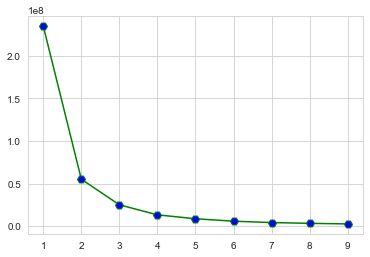

In [55]:
plt.plot(list(sum_square.keys()),
         list(sum_square.values()),
         
         # Some figure aesthetics
         linestyle='-', # '-' for Continuous line 
         marker='H', # 'H' for Hexagons 
         color='g', # 'g' for green color
         markersize = 8, # size of the masker
         markerfacecolor='b') # 'b' for blue color

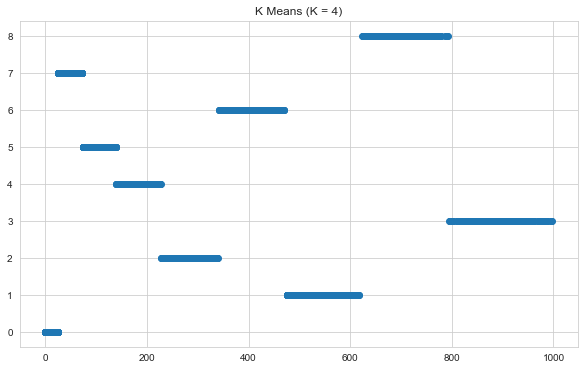

In [56]:
f, ax1 = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(10,6))
# For the fitted one, c = kmeans.labels_  
ax1.set_title('K Means (K = 4)')
ax1.scatter(X,kmeans.labels_, cmap='rainbow')

In [29]:
from sklearn.datasets import make_blobs


In [30]:
data = make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1.8,random_state=101)

In [31]:
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

In [32]:
kmeans.labels_

array([0, 0, 0, ..., 2, 1, 2])

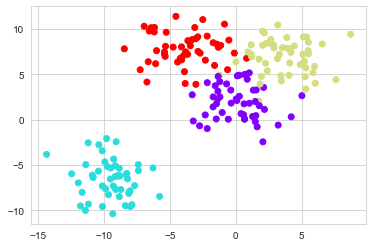

In [33]:
#visualization how the model make cluster. By changing the value of K, the visualization can be differ 
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')